In [ ]:
# Hyperparameter tuning with GridsearchCV
# hyperparameter tuning is a method of feature selection.
# this is used to find the best combination of parameters that result into highest model performance.
# The GridSearchCV object takes an estimator, a parameter grid, and a scoring metric as inputs 
# and performs a grid search over the specified parameter values, 
# evaluating the model's performance using the chosen scoring metric.

# estimator : a machine learning model to be tuned
# parameter grid: dictionary specifying paramter grid to be searched.
# scoring: metric used to evaluate model performance


# applying this for alpha, in ridge regression
# alpha values: {0.01, 0.1, 1, 10, 100}.

In [8]:
# gridsearchCV in ridge regression OLS
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
csv=pd.read_csv('Housing.csv')
# print(csv.head())
x_pn = np.array(
    csv[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']])
y_pn = np.array(csv['price'])
x = (x_pn-np.mean(x_pn))/np.std(x_pn)
y = (y_pn-np.mean(y_pn))/np.std(y_pn)

alpha_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge_model=Ridge()
ridge_model_CV=GridSearchCV(estimator=ridge_model,param_grid=alpha_grid,cv=5)
ridge_model_CV.fit(x,y)

# best alpha
print("Best alpha: ", ridge_model_CV.best_params_)
# best cofficient
print("Best Cofficient: ",ridge_model_CV.best_estimator_.coef_)


Best alpha:  {'alpha': 100}
Best Cofficient:  [4.68078181e-01 5.27492044e-04 5.18176190e-04 7.95276307e-04
 4.67873251e-04]


1.1015690009414525
0.23894288353934012


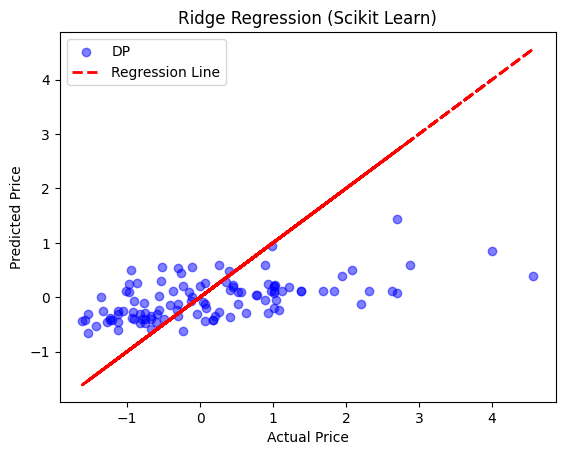

In [ ]:
# as, we can see from the GridSearchCV that, alpha=100, produces the best result,
# then ridge regression

import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score

csv = pd.read_csv('Housing.csv')
# print(csv.head())
x_pn = np.array(
    csv[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']])
y_pn = np.array(csv['price'])
x = (x_pn-np.mean(x_pn))/np.std(x_pn)
y = (y_pn-np.mean(y_pn))/np.std(y_pn)

# splitting into train, test
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

ridge_model=Ridge(alpha=100)
ridge_model.fit(x_train,y_train)
y_prediction=ridge_model.predict(x_test)

# model evaluation using mse,r2
mse=mean_squared_error(y_test,y_prediction)
print(mse)
r2=r2_score(y_test,y_prediction)
print(r2)

plt.scatter(y_test,y_prediction,color='blue',alpha=0.5,label='DP')
plt.plot(y_test,y_test,'r--',lw=2,label="Regression Line")
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Ridge Regression (Scikit Learn)")
plt.legend()
plt.show()
